### This file consists of the clustering of the dataset. This code covers three sets of clustering, Kmeans, DBSCAN and Hierarchical Clustering

In [15]:
# Import all the libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud

In [4]:
# Load the merged dataset
final_data = pd.read_csv("/home/shreyaspujari/Documents/DocumentClustering_Stackoverflow/data/final_dataset.csv")

### In this section I have extracted the features using the TF-IDF verctorizer frkm the dataset and also performed dimensionality redcution using PCA for visualization

In [6]:
# Feature extraction
tfidf_vecttorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vecttorizer.fit_transform(final_data["Question_Body"])

# Dimensionality reduction for visualization
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

### KMeans Clustering

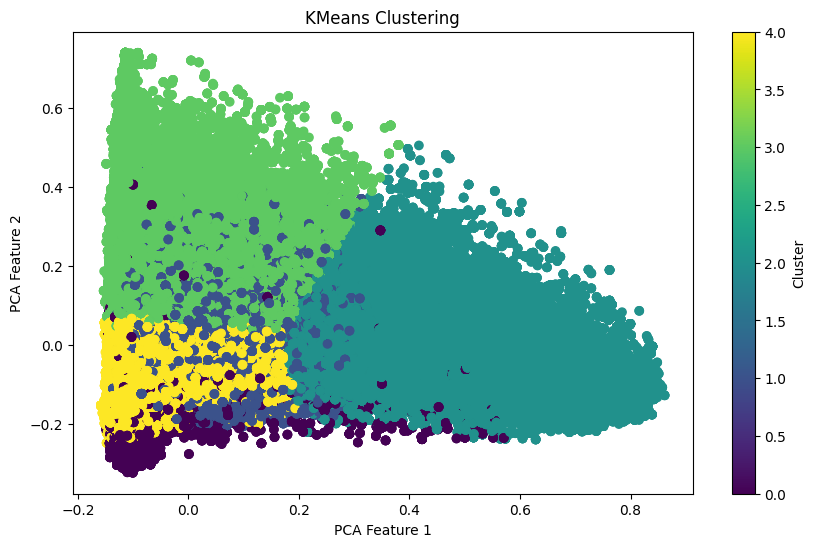

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# Visulize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.colorbar(label="Cluster")
plt.show()

### Wordcloud for KMeans

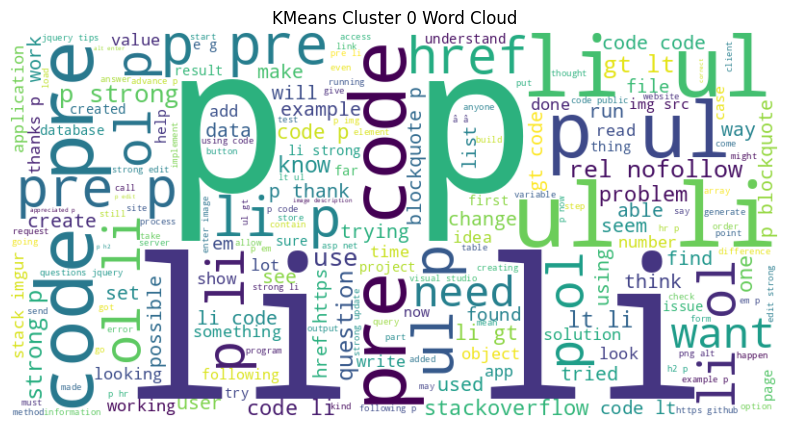

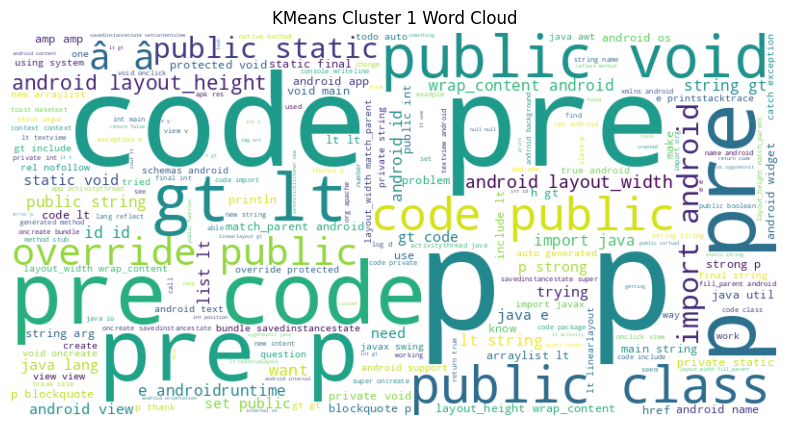

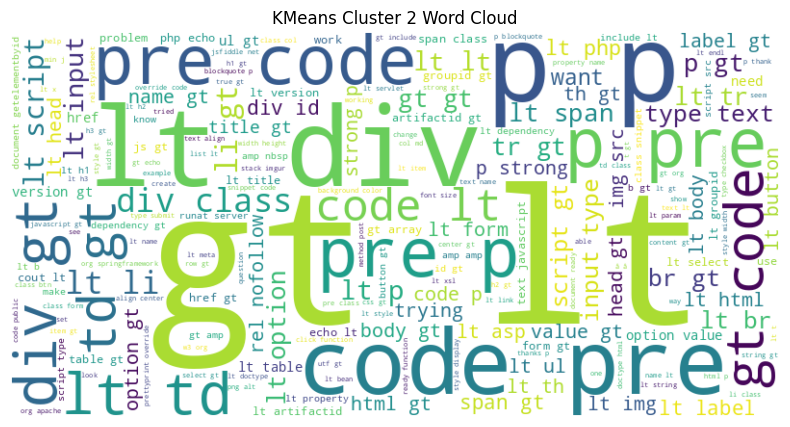

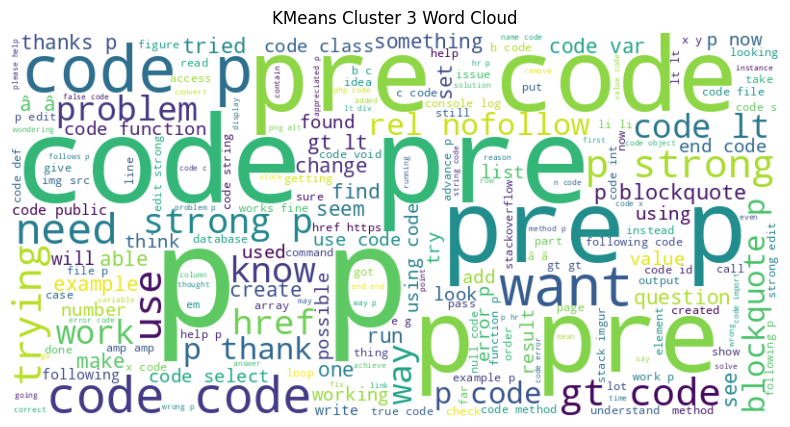

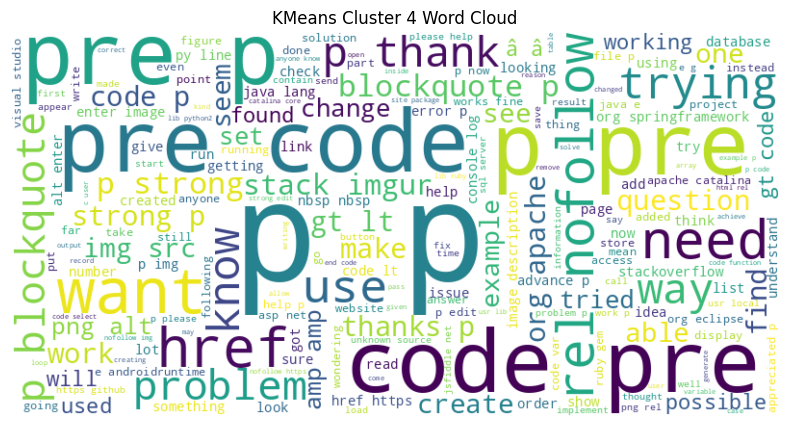

In [11]:
for cluster in range(kmeans.n_clusters):
    cluster_data = final_data[kmeans_labels == cluster]
    text = " ".join(cluster_data["Question_Body"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"KMeans Cluster {cluster} Word Cloud")
    plt.show()

### Meaning of the Word Clouds

As we can see from the above word clouds that were generated from the clusters createdby the Kmeans algorithm, if we take the word clodu for cluster 0 we can see that the words are mainly (code, pre, li, p, ul, href and ref)

#### Technical Tags
If we look at the technical tags for these it is clearn tat these are likely HTML related tags or web development. 

#### Programming related terms (href, rel, stackoverflow)
These terms suggest that the cluster involves questions related to hyperlinks or how to implement links in the web context.

#### Action Oriented Terms
These indicate that the nature of questions mainly involves troubleshoooting or asking help with coding problems.

From the dominence of HTML related terms it is highly likely that cluster 0 mainly deals with Web Development based questions.

### DBSCAN

In [16]:
# Implement Locality Sensitive Hashing (LSH) using NearestNeighbors
lsh_neighbors = NearestNeighbors(algorithm='auto', metric='cosine', n_neighbors=10)
lsh_neighbors.fit(reduced_features)

# Approximate Nearest Neighbor search using LSH
distances, indices = lsh_neighbors.kneighbors(reduced_features)

# Run DBSCAN using precomputed distances
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
distance_matrix = np.zeros((len(reduced_features), len(reduced_features)))

# Construct the precomputed distance matrix
for i, neighbors in enumerate(indices):
    for j, neighbor in enumerate(neighbors):
        distance_matrix[i][neighbor] = distances[i][j]

# Run DBSCAN
dbscan_labels = dbscan.fit_predict(distance_matrix)

# Visualize DBSCAN Clustering with LSH
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_labels, cmap='plasma', s=10)
plt.title("DBSCAN Clustering with LSH")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.colorbar(label="Cluster")
plt.show()

KeyboardInterrupt: 